<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from sklearn.decomposition import PCA
import numpy as np
import scipy
import sklearn
from sklearn.datasets import load_iris
from sklearn.utils.extmath import svd_flip
import matplotlib.pyplot as plt
%matplotlib inline

In this tutorials, we will explore one of the most widely used unsupervised algorithm known as principal component analysis 
or PCA for short, a method for reducing the dimensionality of data and are useful in exploratory data analysis, allowing data visualization, feature extraction and has found application in fields such as face recognition and image compression.

With a dataset containing several variables that are possibly correlated, PCA will reduce these correlated variables into few set of uncorrelated variables that collectively explain most of the variability in the original dataset. **The information in the given dataset corresponds to the total variation it contains and the goal of PCA is to identify the principal directions or principal components along which the variation in the dataset is maximal**.


# Principal Components Analysis

**Principal components analysis denoted as PCA is a dimensionality reduction technique that transforms a larger number of possibly correlated variables which indicate redundancy within the dataset into a set of few new uncorrelated (orthogonal) variables called principal components (PCs) where each component is a linear combination of the original variables**. Variables which correlate with one another will contribute strongly to the same principal component. Each principal component retain a certain percentage of the total variation in the dataset and these components are ordered according to the fraction or percentage of the total information or variation the component retain with the first principal component containing the largest percentage of the variation. The first PC is the dimension along which the data vary the most and defines the line that is 
 close as possible to the observations. The amount of information in each component is measured by the ***Eigenvalues/variances of the PCs***.

> when the data is projected onto a lower dimensional linear space the variance of the projected data is maximized

# EIGEN-DECOMPOSITION


## Principal Components

steps involve in computing the principal components are as follow,

First we calculate the variance-covariance matrix of the data which involves the following.

the covariance between x and y is given as

$$
cov(x,y)=\frac{\sum_{i=1}^{n} (x_{i}- \bar x)(y_{i}-\bar y)}{n-1}
$$

and that of x which is just the variance of x

$$
cov(x,x)=var(x)=\frac{\sum_{i=1}^{n} (x_{i}- \bar x)(x_{i}-\bar x)}{n-1}=\frac{\sum_{i=1}^{n} (x_{i}- \bar x))^{2}}{n-1}
$$


Hence the sample variance-covariance matrix  variance-covariance matrix of a data with three dimension namely **x, y, z** is given as

$$COV(x,y,z)=S =\left[ \begin{array}{ccc}
cov(x,x) & cov(x,y) & cov(x,z) \\
cov(y,x) & cov(y,y) & cov(y,z) \\
cov(z,x) & cov(z,y) & cov(z,z) 
\end{array}\right] $$


We then find the eigenvalues and eigenvectors of this covariance matrix. It turns out that the eigenvector with the highest eigenvalue is the first principle component of the dataset and in that order.


Compute the eigenvalues  $\lambda_1,\lambda_2,\dots,\lambda_d $ Of sample variance-covariance matrix $S$ and the and the corresponding eigenvectors  $ \alpha_1,\alpha_1,\cdots,\alpha_d  $ we then define our estimated principal components using the eigenvectors as our coefficients:

Using the coefficients or loadings of the principal components, we can project the observations on the axis of the principal component using 

$$ \hat{Y}=XA$$ where

$A$ is the matrix of the coefficients of $\alpha$ 


the projections or projected values are the principal component score or just score

**Note: The Projection of a point onto a line simply involves finding the location on the line which is closest to the point**

# Eigenvalues / Variances

The amount of variation retained by each principal component are measured by the eigenvalues and since the PCs are ordered in a descending order according to the information they retained, the first PC corresponds to the directions with the maximum amount of variation in the data set and hence has the largest eigenvalue (That is the eigenvalue with the highest  eigenvector is the first principle component ). let us now examine the eigenvalues to determine the number of principal components to be considered.



In [2]:
iris=load_iris()
X_iris=iris.data
y =iris.target
y_categories_names=iris.target_names

In [3]:
def My_PCAA(X):
    X-=np.mean(X,axis=0)
    con_mat=X.transpose()@X
    eig_va,eigen_vec=np.linalg.eig(con_mat)
    return np.dot(X,eigen_vec)

In [4]:
X_trans=My_PCAA(X_iris)

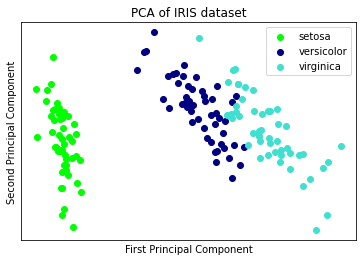

In [5]:
colors = ['lime', 'navy', 'turquoise']
for i in range(len(colors)):
    pca1=X_trans[:,0][y==i]
    pc2=X_trans[:,1][y==i]
    plt.scatter(pca1,pc2,c=colors[i])
    plt.legend(y_categories_names)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('PCA of IRIS dataset')
    plt.xticks([])
    plt.yticks([])
plt.show()


From the diagram we can we that versicolor and virginica are closer to each other which indicates that the versicolor and virginica correlate with each other but are less correlated with sets 

# SVD Decomposition
Suppose that a matrix A is singular or nearly. Let $A= m × n$ matrix of rank r, with m ≥ n. The singular value decomposition of A is

$$A = UDV^{T}$$
where

U is an orthogonal m × n matrix, D is an r × r diagonal matrix, and V is an n × n square orthogonal matrix.
From the last chapter we recall that since
U and V are orthogonal, then
$UU^{T} = VV^{T} = I$

The elements along the diagonal of D  are called the singular values of A. 


The columns of $V$ are principal directions/axes/components. The principal components scores is given by $UD$

In [6]:

def PCA_SVD(X,n_components=None):
    if n_components is not None:
        assert 1<=n_components<=X.shape[1]
    else:
        n_components=X.shape[1]
    X-=np.mean(X,axis=0)
    U,D,Vt=scipy.linalg.svd(X,full_matrices=False)
    U,Vt=svd_flip(U,Vt)
    U=U[:,:n_components]
    U*=D[:n_components]
    PCs=Vt
    return U,PCs,D

In [7]:
X_transformed,components,eig_values=PCA_SVD(X_iris)

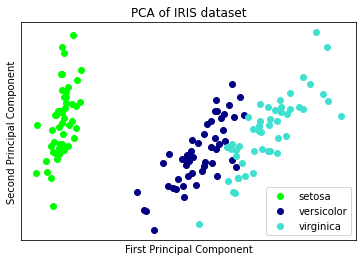

In [8]:
colors = ['lime', 'navy', 'turquoise']
for i in range(len(colors)):
    pca1=X_transformed[:,0][y==i]
    pc2=X_transformed[:,1][y==i]
    plt.scatter(pca1,pc2,c=colors[i])
    plt.legend(y_categories_names)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('PCA of IRIS dataset')
    plt.xticks([])
    plt.yticks([])
plt.show()


In [9]:
components

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

# The Proportion of Variance Explained

<b>Eigenvalues / Variances</b>

The amount of variation retained by each principal component are measured by the eigenvalues, so in calculating for the variance explained by the principal components we will use the eigenvalues     

In [10]:
explained_variance=(eig_values**2)/(len(X_iris)-1)
explained_variance

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

and the proportion of variance retained by each PC is calculated as

In [11]:
total_val=explained_variance.sum()
explained_variance_ratio=explained_variance/total_val
explained_variance_ratio

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

The first principal component explains 92 % of the variance in the data, and the next principal component explains 5%
of the variance. Together, the first two principal components explain almost 97 % of the variance in the data

# USING SCIKIT-LEARN

In [12]:
pca = PCA()
pca.fit(X_iris)

PCA()

In [13]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [14]:
X_transformed_sk=pca.transform(X_iris)

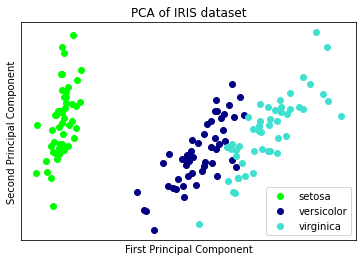

In [15]:
colors = ['lime', 'navy', 'turquoise']
for i in range(len(colors)):
    pca1=X_transformed_sk[:,0][y==i]
    pc2=X_transformed_sk[:,1][y==i]
    plt.scatter(pca1,pc2,c=colors[i])
    plt.legend(y_categories_names)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('PCA of IRIS dataset')
    plt.xticks([])
    plt.yticks([])
plt.show()


Percentage of variance explained by each components

In [16]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [17]:
print("explained variance ratio for the components : %s" %pca.explained_variance_ratio_)

explained variance ratio for the components : [0.92461872 0.05306648 0.01710261 0.00521218]


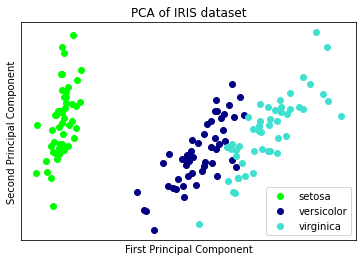

In [18]:
colors = ['lime', 'navy', 'turquoise']
for i in range(len(colors)):
    pca1=X_transformed[:,0][y==i]
    pc2=X_transformed[:,1][y==i]
    plt.scatter(pca1,pc2,c=colors[i])
    plt.legend(y_categories_names)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('PCA of IRIS dataset')
    plt.xticks([])
    plt.yticks([])
plt.show()


<a href='https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html'>In Depth: Principal Component Analysis</a>


[Principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis "wikipeida")

[Application of Principal Component Analysis to Image Compression](https://www.intechopen.com/books/statistics-growing-data-sets-and-growing-demand-for-statistics/application-of-principal-component-analysis-to-image-compression "By Wilmar Hernandez and Alfredo Mendez")

<a href=''></a>

<a href=''></a>

<a href=''></a>

<a href=''></a>

<a href=''></a>